Task
- Реалізація нотебуки для візуалізації детектора - acceptance criteria:
    - задати шлях до моделі та иніціалізувати модель
    - задати шлях до зображення
    - відобразити вихідне зображення 
    - виконати детекцію 
    - відобразити результати детектції на вихідному зображенні у вигляді bounding boxes різного кольору для різних класів та назву класу й конфіденс

In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
from matplotlib import pyplot as plt
import torch

In [4]:
def getColorDictionary():
    object_to_color = {
        "cannon": (173, 216, 230),     # Light Blue
        "car": (0, 0, 255),           # Red -> car = vehicle
        "motorcycle": (255, 255, 0),     # Yellow
        "aircraft": (128, 0, 128),    # Purple
        "helicopter": (0, 165, 255),  # Orange
        "airdefence": (0, 0, 0),      # Black
        "ships": (0, 128, 0),         # Green
        "other": (0, 0, 139),         # Dark Blue
        "civil": (255, 192, 203)      # Pink
    }
    
    return object_to_color 

In [5]:
def getClassIdNames(value):
    id_to_name = {0: 'person', 1: 'bicycle', 2: "car", 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}        
    name = id_to_name.get(value)
    return name

In [6]:
def drawBBX(image, bounding_boxes):
    # Define font settings for labels
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
   
    object_to_color = getColorDictionary()
    
    if image is None:
        print("Error: Unable to load the image.")
        exit()


    # Convert the original tensor into a list of tensors
    list_of_boxes = [row.tolist() for row in bounding_boxes]

    
    i = 0
    print("LSTOFBOX: ", len(list_of_boxes[0]))
    for boxes in list_of_boxes[0]: 
        x1, y1, x2, y2, confidence, class_id = boxes  # Unpack all elements of the box
        print(i)      
         
        # Get the color for the class
        name = getClassIdNames(int(class_id))
        color = object_to_color.get(name)

        if color is None:
            # Handle the case where no color is found
            print(f"No color found for class_id {int(class_id)}")
            continue

        # Ensure that x1, y1, x2, and y2 are integers (rounding float values if necessary)
        x1, y1, x2, y2 = int(round(x1)), int(round(y1)), int(round(x2)), int(round(y2))

        # Convert the color to a tuple of integers (BGR format)
        color = tuple(map(int, color))

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Create a label with class and confidence
        label = f'Class {getClassIdNames(int(class_id))}: {confidence:.2f}'

        # Get the size of the label text
        (label_width, label_height), _ = cv2.getTextSize(label, font, font_scale, font_thickness)

        # Put text on the label
        cv2.putText(image, label, (x1, y1 - 5), font, font_scale, (0, 0, 0), font_thickness)
        i+=1

    # Display the image with the bounding boxes
    cv2.imshow('Image with Bounding Boxes', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()    

In [7]:
#задати шлях до зображення 
path_to_image = "E:/KHPI/Computer Vision/Lab(1-5)/pics/moto.jpeg"

#задати шлях до моделі 
path_to_model = "yolov8n.pt"

#иніціалізувати модель
model = YOLO(path_to_model)  # loading a pretrained model, #'yolov8n.pt'

try:
    #зчитати зображення
    image = cv2.imread(path_to_image)
except:
    raise Exception("Image wasn`t read!")

#відобразити вхідне зображення
cv2.imshow("Initial Picture", image)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.waitKey(0) 
cv2.destroyAllWindows()  

#виконати детекцію
results = model(path_to_image)

bounding_boxes = []
    
for result in results:
    bounding_boxes.append(result.boxes.data) 


### Винести у функцію draw #######
drawBBX(image, bounding_boxes)




image 1/1 E:\KHPI\Computer Vision\Lab(1-5)\pics\moto.jpeg: 416x640 2 persons, 23 cars, 1 motorcycle, 2 trucks, 186.4ms
Speed: 6.0ms preprocess, 186.4ms inference, 10.0ms postprocess per image at shape (1, 3, 416, 640)


LSTOFBOX:  28
0
1
2
3
4
5
No color found for class_id 7
5
6
7
8
9
10
11
12
13
14
15
16
No color found for class_id 7
16
17
18
19
20
21
No color found for class_id 0
21
22
23
24
No color found for class_id 0


<b>Results<b>

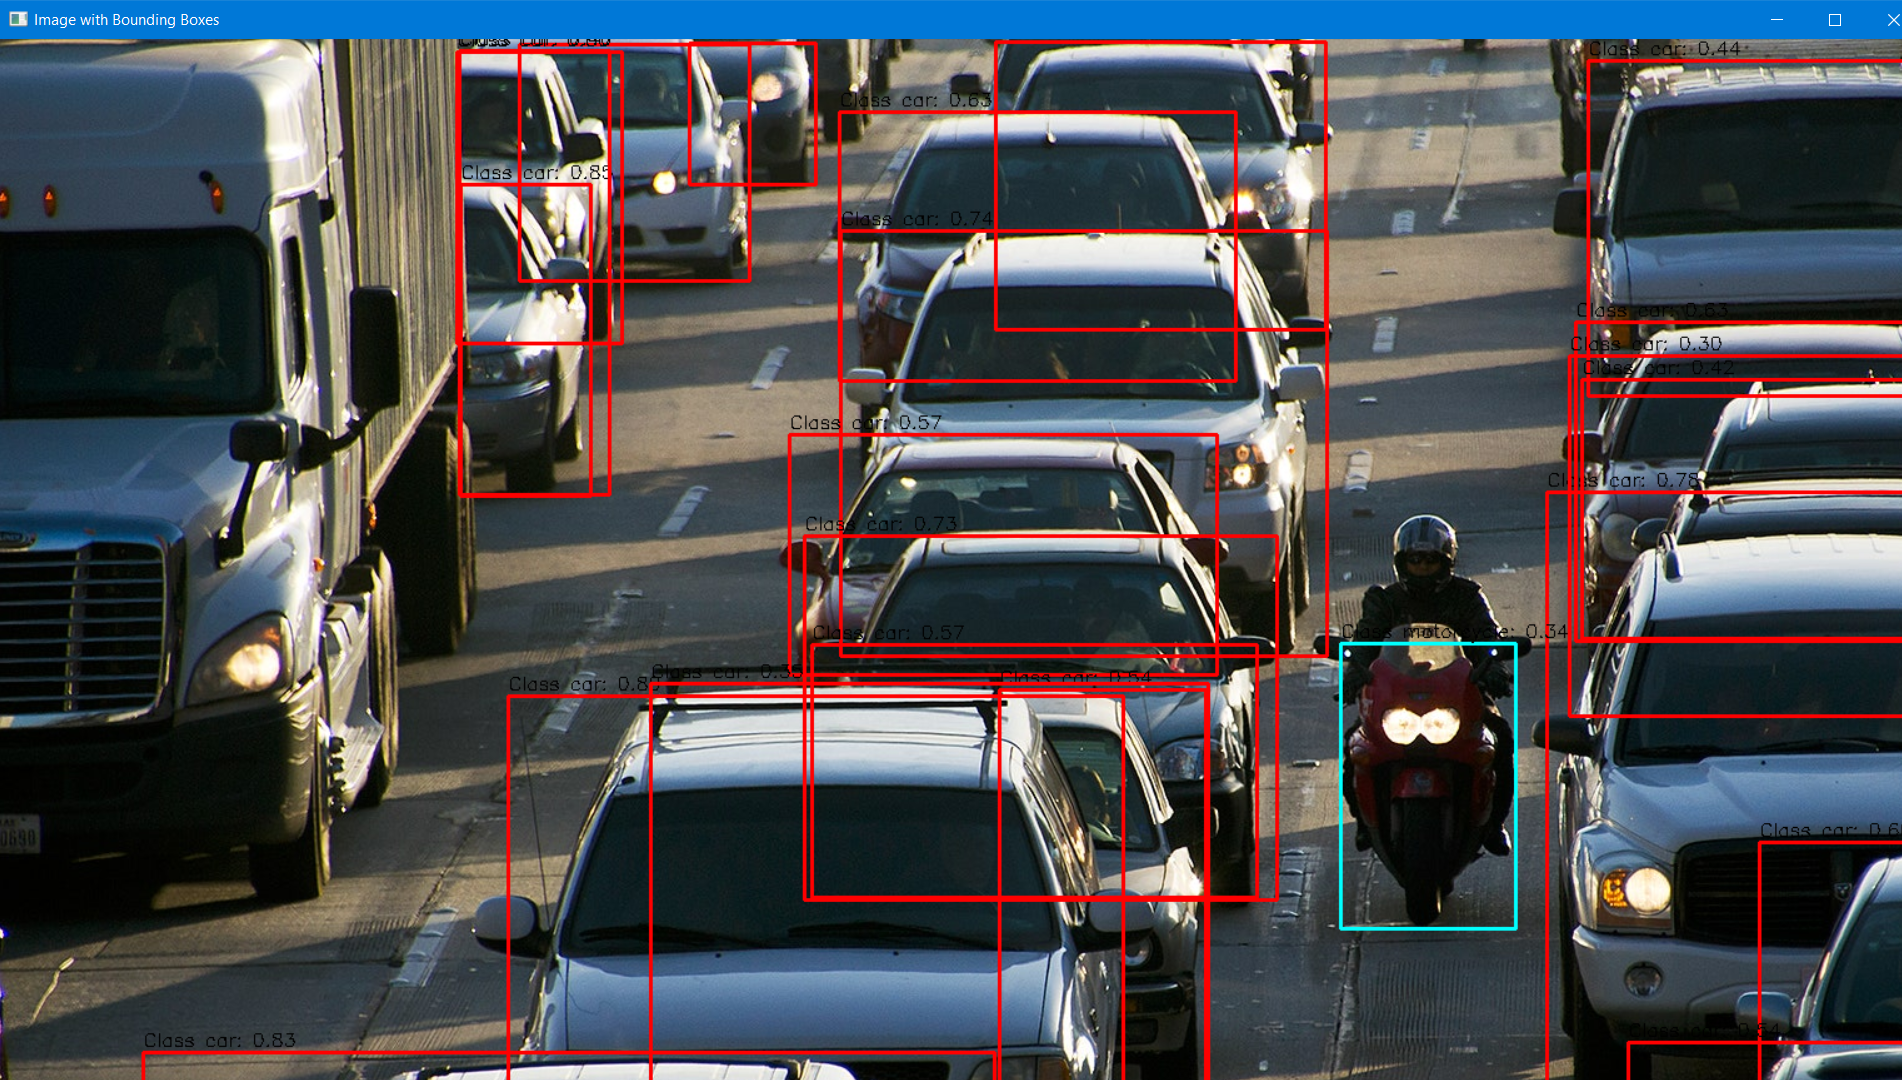

<br>Там де не розмічено, означає що просто для такого об'єкту кольор не назначений. З логів вище.